100.0%. Run time:   1.94s. Est. time left: 00:00:00:00
Total run time:   2.09s


ValueError: x and y must have same first dimension, but have shapes (99,) and (1,)

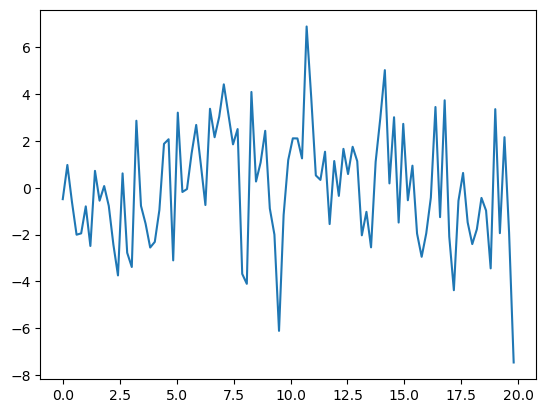

In [6]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 1  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 100)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Simulación con detección heterodina
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    heterodyne=False,  # Activar detección heterodina
    e_ops=expect_values,  # Valores esperados
    ntraj=1,  # Número de trayectorias
    options=options,
)

# Reestructuramos las mediciones
measurements = np.squeeze(result.measurement)  # Reducimos dimensiones
I_real = measurements  # Cuadratura real


# Graficamos las corrientes medidas
plt.figure()
plt.plot(tlist[:-1], I_real, label="I_real (cuadratura X)")
plt.plot(tlist[:-1], I_imag, label="I_imag (cuadratura Y)")
plt.xlabel("Tiempo")
plt.ylabel("Corriente de medición")
plt.legend()
plt.title("Señal de detección heterodina")
plt.show()

# Extraemos las probabilidades de estado
P_e = result.expect[0]
P_g = result.expect[1]

# Graficamos las probabilidades
plt.figure()
plt.plot(tlist, P_e, label="P(|e>)")
plt.plot(tlist, P_g, label="P(|g>)")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.legend()
plt.title("Dinámica del sistema bajo detección heterodina")
plt.show()


In [5]:
measurements

array([ 3.43447823,  1.49137469, -3.95683058, -0.22776845,  1.00270427,
       -2.99685537, -0.33936694, -4.23578297,  1.51004551,  1.70854418,
       -4.46843407,  1.03379242,  0.03154042,  0.4571936 , -0.33788301,
       -0.62041317, -0.24358129, -5.701444  , -1.36216516, -3.81358829,
       -3.18745086,  0.67469722, -4.29014357,  2.66755188, -1.16290938,
       -1.07290742, -1.87079066, -3.67519747, -3.9983138 , -0.43425443,
        0.03339957,  1.51752516,  0.0211899 ,  0.64026735,  0.92307494,
        1.423144  , -3.26445856, -0.57084567, -2.638083  ,  1.01788523,
        4.56085655,  1.32821394,  3.26417412, -2.13091127,  2.0589922 ,
        2.50973389, -0.59449032, -1.40409811,  2.60274907,  2.28567822,
        2.64278826, -0.19547032,  1.68587334, -1.55918871, -1.21527872,
        2.58231697,  0.77210856,  1.9294427 , -2.38125855,  1.89460301,
       -0.63841681, -2.75534335,  2.15531679,  4.05529242, -3.05372108,
       -3.72416794,  1.32836146,  4.86908012,  0.4323588 ,  1.47

In [2]:
from qutip import basis, smesolve,ssesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg
psi0 = (qt.basis(2, 0) + qt.basis(2, 1)).unit()
# Operadores de proyección
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 3  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 100)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Número de trayectorias
ntraj = 100  # Cambia este número para ajustar el promedio

# Simulación con detección heterodina
result = ssesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    heterodyne=True,  # Activar detección heterodina
    e_ops=expect_values,  # Valores esperados
    ntraj=ntraj,  # Número de trayectorias
    options=options,
)

# Reestructuramos las mediciones
measurements = np.squeeze(result.measurement)  # Reducimos dimensiones
I_real = np.mean(measurements[0], axis=0)  # Promedio de la cuadratura real
I_imag = np.mean(measurements[1], axis=0)  # Promedio de la cuadratura imaginaria

# Graficamos las corrientes medidas (promediadas)
plt.figure()
plt.plot(tlist[:-1], I_real, label="I_real (cuadratura X)")
plt.plot(tlist[:-1], I_imag, label="I_imag (cuadratura Y)")
plt.xlabel("Tiempo")
plt.ylabel("Corriente de medición")
plt.legend()
plt.title(f"Señal de detección heterodina (promedio de {ntraj} trayectorias)")
plt.show()

# Extraemos las probabilidades de estado (promediadas)
P_e = np.mean(result.expect[0], axis=0).flatten()  # Promedio y aplanado sobre trayectorias
P_g = np.mean(result.expect[1], axis=0).flatten()  # Promedio y aplanado sobre trayectorias


# Graficamos las probabilidades (promediadas)
plt.figure()
plt.plot(tlist, np.array(result.expect[0]), label="P(|e>)")
plt.plot(tlist, np.array(result.expect[1]), label="P(|g>)")
plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.legend()
plt.title(f"Dinámica del sistema (promedio de {ntraj} trayectorias)")
plt.show()



NameError: name 'qt' is not defined

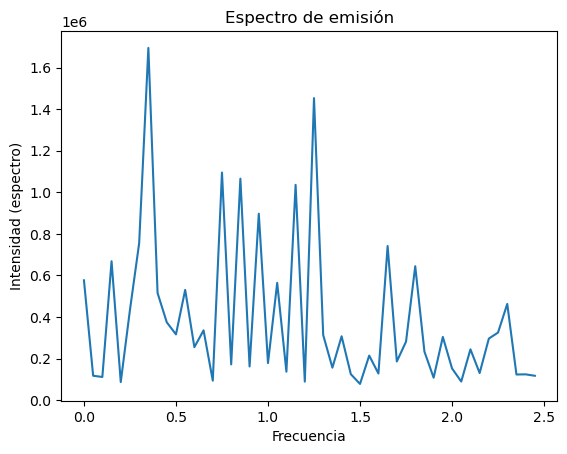

In [9]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Corrientes medidas (usamos las corrientes reales como ejemplo)
# Asegúrate de que `I_real` ya esté promediado sobre trayectorias si es necesario.
signal = I_real

# Tiempo entre puntos
dt = tlist[1] - tlist[0]

# Autocorrelación de la señal
correlation = np.correlate(signal, signal, mode='full')
correlation = correlation[correlation.size // 2:]  # Usamos solo la mitad positiva

# Transformada de Fourier de la autocorrelación
spectrum = np.abs(fft(correlation))**2

# Frecuencias asociadas
freqs = fftfreq(len(correlation), d=dt)

# Nos quedamos con las frecuencias positivas
positive_freqs = freqs[freqs >= 0]
positive_spectrum = spectrum[freqs >= 0]

# Graficamos el espectro
plt.figure()
plt.plot(positive_freqs, positive_spectrum)
plt.xlabel("Frecuencia")
plt.ylabel("Intensidad (espectro)")
plt.title("Espectro de emisión")
plt.show()
